# Nettoyage

## Importation des bibliothèques

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

In [3]:
dataset = pd.read_csv('dataset.csv', nrows=1000)

In [4]:
dataset.head()

,id_stat,nom_region,nom_espece,date_plantation,superficie,pluviometrie,temperature_min,temperature_max,taux_survie_plants,rendement_moyen,annee
0,1,Abidjan,Cacao,2023-04-26,311.35,221.88,23.68,27.66,81.44,9.40,2019
1,1,Abidjan,Cacao,2023-08-20,141.35,221.88,23.68,27.66,81.44,9.40,2019
2,1,Abidjan,Cacao,2024-03-27,301.74,221.88,23.68,27.66,81.44,9.40,2019
3,2,Abidjan,Café,2019-06-26,114.35,92.11,23.94,34.81,75.21,6.29,2019
4,2,Abidjan,Café,2019-12-01,253.65,92.11,23.94,34.81,75.21,6.29,2019


Ajout de nouvelle colonne

In [5]:
# Convertir la colonne 'date' en type datetime
dataset['date_plantation'] = pd.to_datetime(dataset['date_plantation'], errors='coerce')  # Gestion des erreurs pour les dates non valides

# Ajouter la colonne température moyenne
dataset['temperature_moyenne'] = (dataset['temperature_min'] + dataset['temperature_max']) / 2

# Ajouter la colonne mois de plantation
dataset['mois_plantation'] = dataset['date_plantation'].dt.month

# Afficher les premières lignes du dataset enrichi
dataset.head()

,id_stat,nom_region,nom_espece,date_plantation,superficie,pluviometrie,temperature_min,temperature_max,taux_survie_plants,rendement_moyen,annee,temperature_moyenne,mois_plantation
0,1,Abidjan,Cacao,2023-04-26,311.35,221.88,23.68,27.66,81.44,9.40,2019,25.670,4
1,1,Abidjan,Cacao,2023-08-20,141.35,221.88,23.68,27.66,81.44,9.40,2019,25.670,8
2,1,Abidjan,Cacao,2024-03-27,301.74,221.88,23.68,27.66,81.44,9.40,2019,25.670,3
3,2,Abidjan,Café,2019-06-26,114.35,92.11,23.94,34.81,75.21,6.29,2019,29.375,6
4,2,Abidjan,Café,2019-12-01,253.65,92.11,23.94,34.81,75.21,6.29,2019,29.375,12


Analyses et Visualisation


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

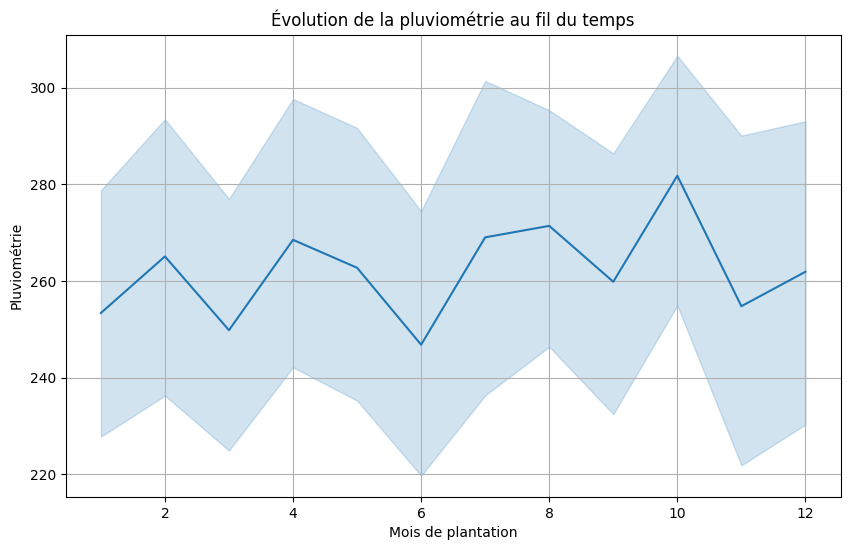

In [7]:
# Pluviométrie au fil du temps
plt.figure(figsize=(10, 6))
sns.lineplot(data=dataset, x='mois_plantation', y='pluviometrie')
plt.title("Évolution de la pluviométrie au fil du temps")
plt.xlabel("Mois de plantation")
plt.ylabel("Pluviométrie")
plt.grid(True)
plt.show()

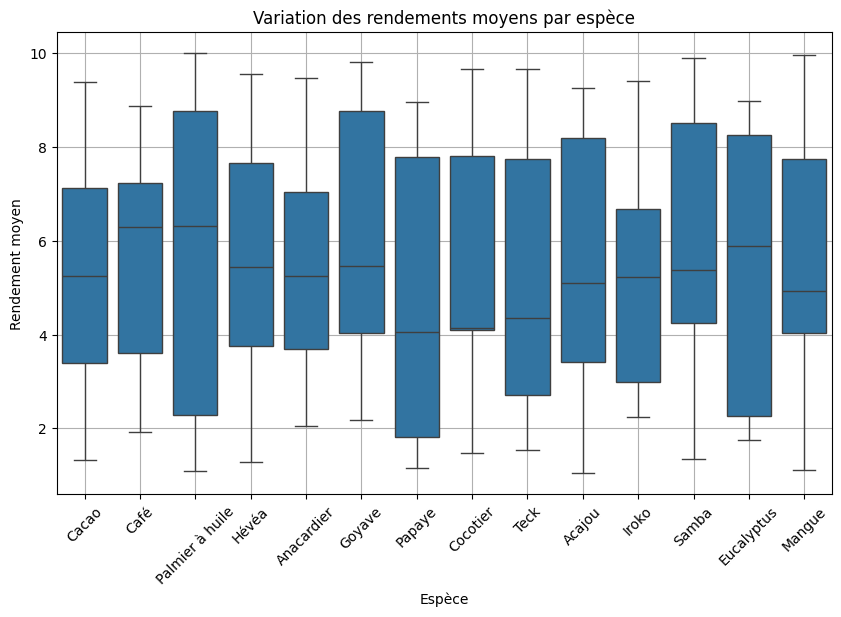

In [8]:
# Créer une nouvelle colonne 'année' à partir de la date
dataset['année'] = dataset['date_plantation'].dt.year

# Boxplot : Rendement moyen par espèce
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='nom_espece', y='rendement_moyen')
plt.title("Variation des rendements moyens par espèce")
plt.xlabel("Espèce")
plt.ylabel("Rendement moyen")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



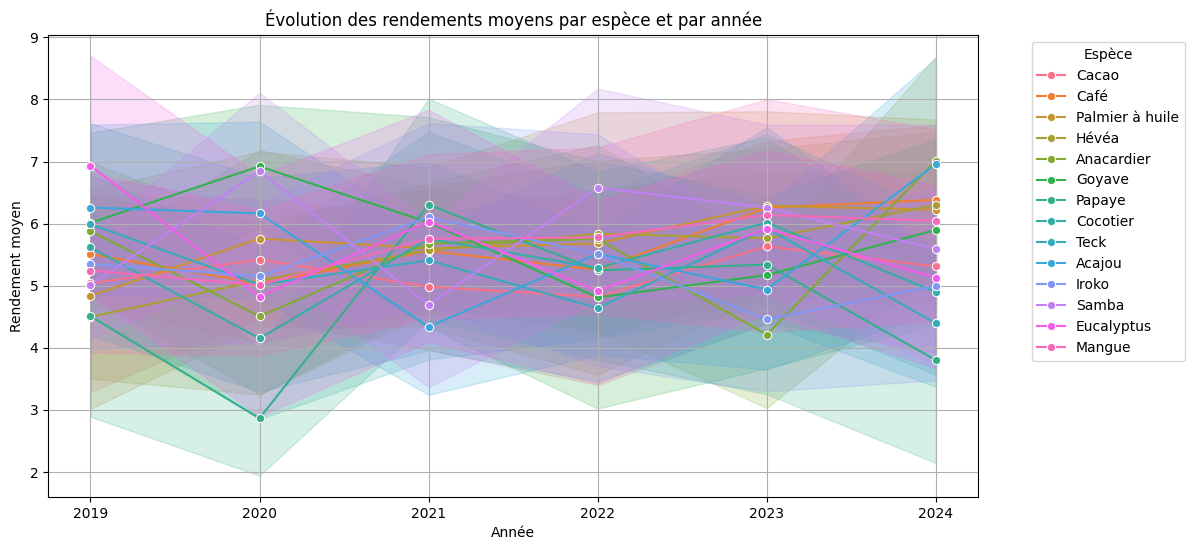

In [9]:
# Lineplot : Rendement moyen au fil des années pour chaque espèce
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset, x='année', y='rendement_moyen', hue='nom_espece', marker="o")
plt.title("Évolution des rendements moyens par espèce et par année")
plt.xlabel("Année")
plt.ylabel("Rendement moyen")
plt.legend(title="Espèce", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

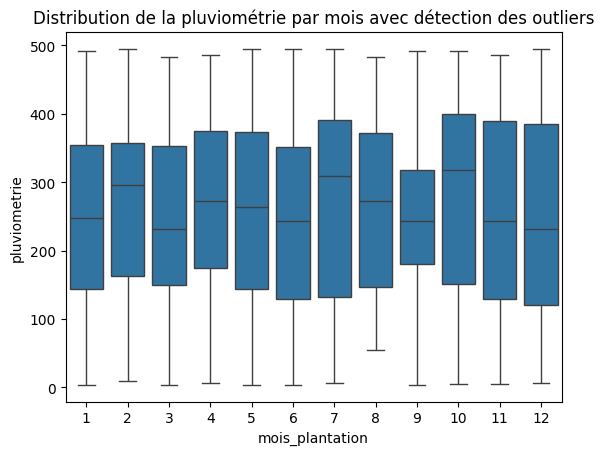

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un boxplot pour la pluviométrie
sns.boxplot(data=dataset, x='mois_plantation', y='pluviometrie', showfliers=True)
plt.title("Distribution de la pluviométrie par mois avec détection des outliers")
plt.show()


In [12]:
# Filtrer les données pour la région d'Abidjan
abidjan_data = dataset[dataset['nom_region'] == 'Abidjan']


C:\Users\kadyk\AppData\Local\Temp\ipykernel_26272\1859289403.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=abidjan_data, x='mois_plantation', y='pluviometrie', palette="coolwarm")


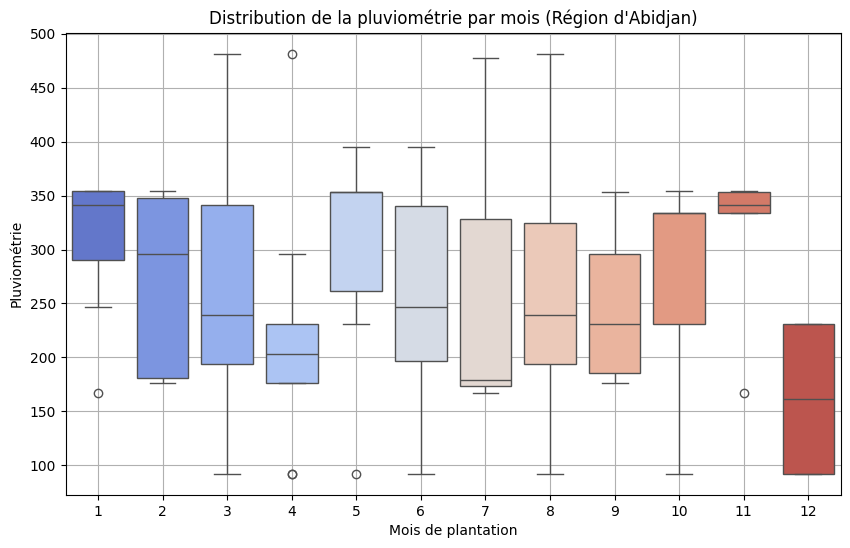

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot pour la pluviométrie en fonction des mois, région d'Abidjan
plt.figure(figsize=(10, 6))
sns.boxplot(data=abidjan_data, x='mois_plantation', y='pluviometrie', palette="coolwarm")

# Ajouter un titre et des labels
plt.title("Distribution de la pluviométrie par mois (Région d'Abidjan)")
plt.xlabel("Mois de plantation")
plt.ylabel("Pluviométrie")
plt.grid(True)
plt.show()


In [17]:
# Moyennes et percentiles par mois
dataset.groupby('mois_plantation')['pluviometrie'].describe()


,count,mean,std,min,25%,50%,75%,max
mois_plantation,,,,,,,,
1,85.0,253.381176,122.097226,3.83,143.2700,247.570,354.6600,491.19
2,75.0,265.082533,125.240967,9.66,162.3900,296.180,356.9450,495.03
3,89.0,249.836966,121.195672,3.83,149.3600,231.750,353.2400,483.52
4,76.0,268.513158,125.829110,6.55,174.3725,273.155,374.5725,485.53
5,95.0,262.736842,144.100845,3.83,143.2700,263.850,372.9600,495.03
6,90.0,246.828333,128.072992,3.83,129.8625,242.570,351.4125,495.03
7,72.0,269.024028,140.967436,6.55,132.0300,308.550,391.1950,495.03
8,86.0,271.400233,121.749016,54.63,146.1100,272.235,371.9625,482.56
9,81.0,259.843704,126.752765,3.83,180.1200,243.720,318.2000,491.19


In [22]:
# Moyenne, écart type et percentiles par région et par mois
dataset.groupby(['nom_region', 'mois_plantation'])['pluviometrie'].describe()


count        mean         std     min       25%  \
nom_region mois_plantation                                                    
Abidjan    1                  7.0  307.474286   72.696597  167.26  290.4400   
           2                  7.0  269.162857   86.153715  176.68  180.8800   
           3                 14.0  275.597857  113.446226   92.11  194.2800   
           4                 10.0  218.496000  111.624115   92.11  176.6800   
           5                  6.0  296.365000  114.355115   92.11  261.8150   
...                           ...         ...         ...     ...       ...   
Zanzan     8                  8.0  290.246250  117.195732   87.44  261.0100   
           9                  4.0  358.115000   64.629610  307.99  307.9900   
           10                 6.0  284.455000  162.114645   87.44  150.9875   
           11                 1.0  353.240000         NaN  353.24  353.2400   
           12                 8.0  359.463750  128.205994   87.44  333.2200   

                                50%       75%     max  
nom_region mois_plantation                             
Abidjan    1                341.620  353.9500  354.66  
           2                296.180  347.4300  354.66  
           3                239.225  341.6200  481.56  
           4                203.480  231.3400  481.56  
           5                353.240  353.2400  395.02  
...                             ...       ...     ...  
Zanzan     8                351.725  360.9900  373.02  
           9                340.505  390.6300  443.46  
           10               344.980  352.0125  488.65  
           11               353.240  353.2400  353.24  
           12               364.070  452.1950  488.65  

[167 rows x 8 columns]

In [24]:
def replace_outliers_with_median(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group.apply(lambda x: group.median() if (x < lower_bound or x > upper_bound) else x)

dataset['pluviometrie_cleaned'] = dataset.groupby(['nom_region', 'mois_plantation'])['pluviometrie'].transform(replace_outliers_with_median)


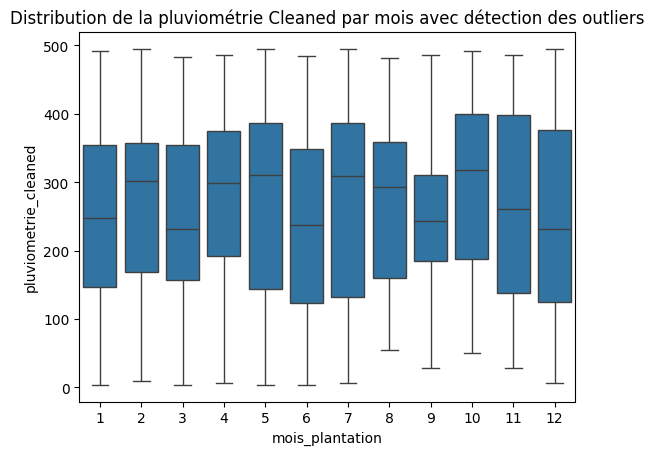

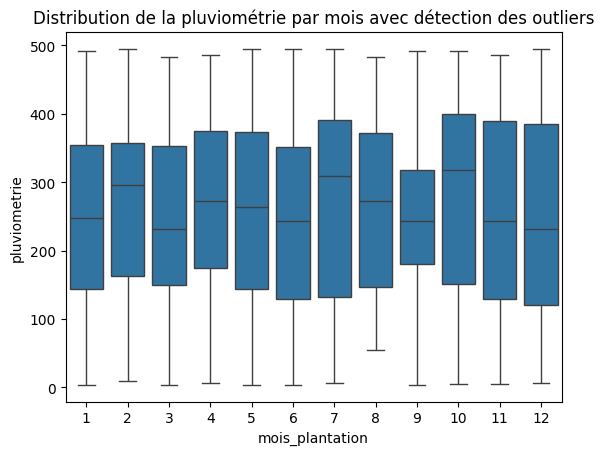

In [30]:
# Boxplot pour la pluviométrie en fonction des mois, région d'Abidjan
sns.boxplot(data=dataset, x='mois_plantation', y='pluviometrie_cleaned', showfliers=True)
plt.title("Distribution de la pluviométrie Cleaned par mois avec détection des outliers")
plt.show()

sns.boxplot(data=dataset, x='mois_plantation', y='pluviometrie', showfliers=True)
plt.title("Distribution de la pluviométrie par mois avec détection des outliers")
plt.show()

C:\Users\kadyk\AppData\Local\Temp\ipykernel_26272\498787090.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=abidjan_data, x='mois_plantation', y='pluviometrie_cleaned', palette="coolwarm")


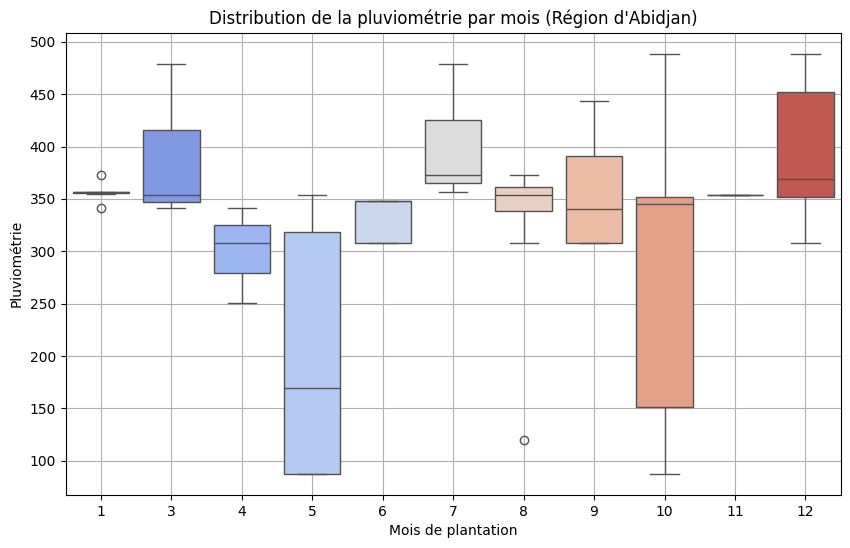

In [33]:
# Filtrer les données pour la région d'Abidjan
abidjan_data = dataset[dataset['nom_region'] == 'Abidjan']
# Boxplot pour la pluviométrie en fonction des mois, région d'Abidjan
plt.figure(figsize=(10, 6))
sns.boxplot(data=abidjan_data, x='mois_plantation', y='pluviometrie_cleaned', palette="coolwarm")

# Ajouter un titre et des labels
plt.title("Distribution de la pluviométrie par mois (Région d'Abidjan)")
plt.xlabel("Mois de plantation")
plt.ylabel("Pluviométrie")
plt.grid(True)
plt.show()

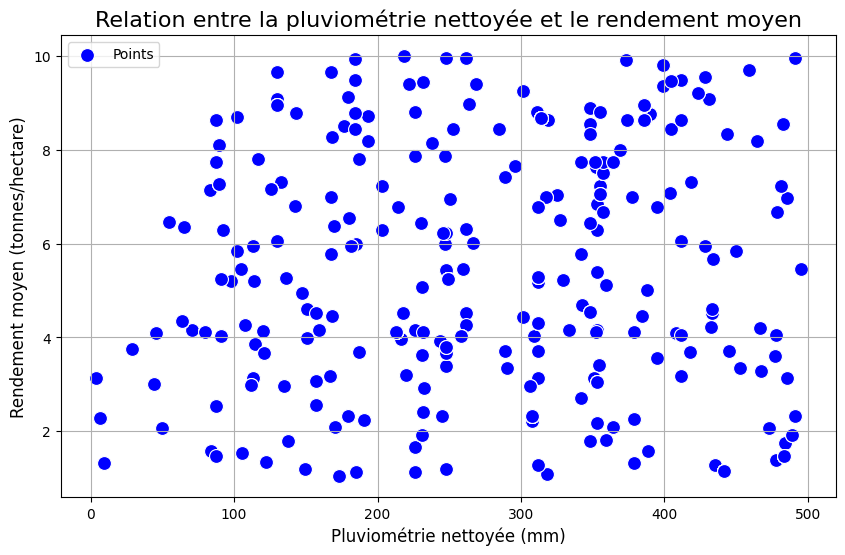

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='pluviometrie_cleaned', y='rendement_moyen', s=100, color='blue', label="Points")

plt.title('Relation entre la pluviométrie nettoyée et le rendement moyen', fontsize=16)
plt.xlabel('Pluviométrie nettoyée (mm)', fontsize=12)
plt.ylabel('Rendement moyen (tonnes/hectare)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


Rendement moyen en fonction de la superficie

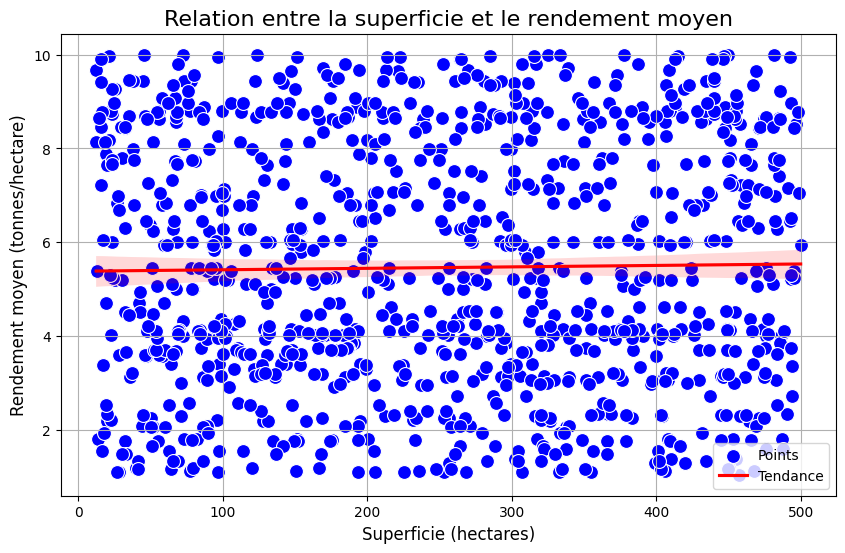

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='superficie', y='rendement_moyen', color='blue', label="Points", s=100)
sns.regplot(data=dataset, x='superficie', y='rendement_moyen', scatter=False, color='red', label="Tendance")
plt.title('Relation entre la superficie et le rendement moyen', fontsize=16)
plt.xlabel('Superficie (hectares)', fontsize=12)
plt.ylabel('Rendement moyen (tonnes/hectare)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

Analyse des données linéaires ou non

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Données d'entraînement et de test
X = dataset[['pluviometrie_cleaned',]]  # Ajoutez toutes les variables pertinentes
y = dataset['rendement_moyen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Erreur quadratique moyenne : {mse}')



Erreur quadratique moyenne : 1.7387974887121516


In [46]:
variance = y.var()
print(f"Variance du rendement moyen : {variance}")


Variance du rendement moyen : 6.7924390621621615


In [47]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² : {r2}")


R² : 0.7335502927809403


In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"R² moyen en validation croisée : {scores.mean():.4f}")


R² moyen en validation croisée : -0.5438


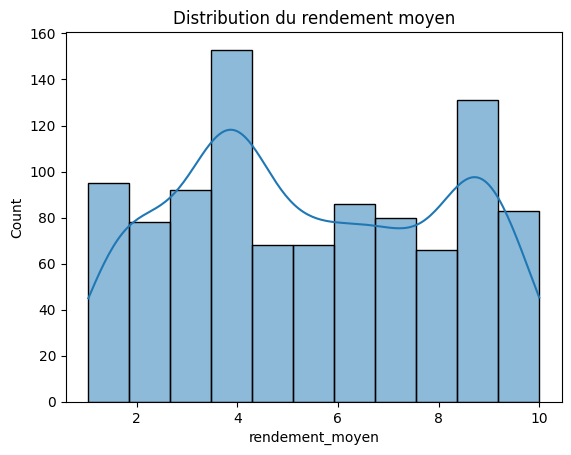

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y, kde=True)
plt.title("Distribution du rendement moyen")
plt.show()


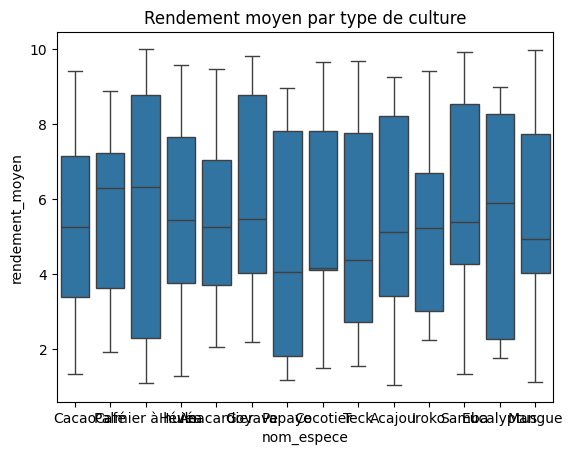

In [51]:
sns.boxplot(data=dataset, x='nom_espece', y='rendement_moyen')
plt.title('Rendement moyen par type de culture')
plt.show()


In [52]:
dataset.to_csv('dataset_cleaned.csv', index=False)